# A Demo of this Project's  DataLoaders

This project uses a custom DataLoader to load patches of images from a larger histopathology slide, and there associated labels.

In [1]:

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from dataset.dataloader import get_data_loaders
import numpy as np


train_loader, test_loader, dev_loader = get_data_loaders(batch_size=5)

# Get a batch of training data
images, labels = next(iter(dev_loader))

# Print the shape of the images and labels
print(images.shape)


/projects/dsci410_510/jakes_example
/projects/dsci410_510/jakes_example
/projects/dsci410_510/jakes_example/develop


FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/jsearcy/ProjectMilestoneExample/venv/lib64/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/home/jsearcy/ProjectMilestoneExample/venv/lib64/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/jsearcy/ProjectMilestoneExample/venv/lib64/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/gpfs/home/jsearcy/ProjectMilestoneExample/dataset/dataloader.py", line 29, in __getitem__
    image = Image.open(img_name).convert('RGB')
  File "/home/jsearcy/ProjectMilestoneExample/venv/lib64/python3.9/site-packages/PIL/Image.py", line 3465, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/projects/dsci410_510/jakes_example/develop/10003.jpeg'


# Plot the first batch of images 


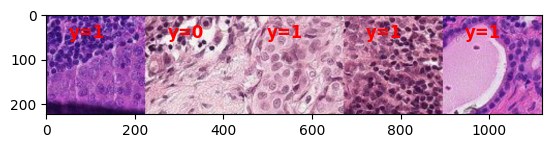

In [ ]:
from matplotlib import pyplot as plt
# Undo image normalization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225] 
plot_images = images * torch.tensor(std).view(1,3,1,1) + torch.tensor(mean).view(1,3,1,1)
plot_images = (plot_images * 255.0)
plot_images = plot_images.numpy().transpose(0, 2, 3, 1).astype(np.uint8)
plt.imshow(np.hstack(plot_images))
for index, l in enumerate(labels):
    plt.text(index*224+50, 50, "y="+str(l.item()), color='red', fontsize=12,fontweight='bold')
plt.show()